1. Install all the necessary libraries and read the provided dataset. (1 point)


In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from sklearn import preprocessing

In [2]:
app_df = pd.read_csv("Apps_data+(1).csv")

a. Check the info and summary statistics of the dataset. List out the columns
    that need to be worked upon for model building. (2 points)

Except Rating remaining columns have object type so we need to convert them to numbers
There are missing vaues for Rating with NaN

In [3]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
app_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
print(app_df.Category.value_counts())

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64


In [6]:
app_df.shape

(10841, 13)

b. Check if there are any duplicate entries for the apps (1 point)

Yes there are duplicates

In [7]:
print(app_df.App.value_counts())

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Free Books - Spirit Fanfiction and Stories           1
Lock Screen - DU Locker & Lock screen wallpaper      1
Adhenarcos - Coupe Adhemar EY 2018                   1
Christella VoiceUp                                   1
quran-DZ                                             1
Name: App, Length: 9660, dtype: int64


In [8]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
app_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [10]:
print(app_df.App.value_counts())

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Free Books - Spirit Fanfiction and Stories           1
Lock Screen - DU Locker & Lock screen wallpaper      1
Adhenarcos - Coupe Adhemar EY 2018                   1
Christella VoiceUp                                   1
quran-DZ                                             1
Name: App, Length: 9660, dtype: int64


c. Check if there are any wrong values in the ‘Category’ column and impute
    them with relevant values. (2 points)

1.9 is wrong value for category

In [11]:
app_df.drop(app_df[app_df['Category'] == 1.9].index, inplace = True)

In [12]:
print(app_df.Category.value_counts())

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64


d. Which category has the highest number of apps? (2 points)

FAMILY                 1972 category has the highest

e. Check the distribution of rating column and convert ratings into two
categories and save it in the data frame as ‘Rating_cat’ ( high = +>3.5 and
    remaining as low) (2 points)

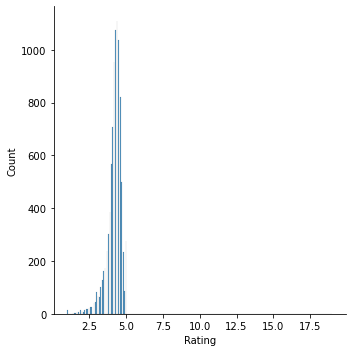

In [13]:
import seaborn as sns
sns.displot(app_df, x="Rating")

In [14]:
app_df['Rating'].fillna(app_df['Rating'].mean(), inplace = True)
Rating_cat = pd.cut(app_df.Rating,bins=[0,3.5,5],labels=['low','high'])

f. Convert the ‘Review’ column to a numerical column and impute invalid
    values if there are any. (1 point)

In [15]:
pd.DataFrame({'value' : app_df['Reviews'], 'Missing?' : app_df['Reviews'].isnull()}) 
pd.to_numeric(app_df['Reviews'], errors='coerce')

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10841, dtype: float64

In [16]:
app_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

g. Name the top 5 apps which have the highest number of reviews and their
    genre? (1 point)
These are the top 5
Facebook - Social
WhatsApp Messenger - Communication
Instagram - Social
Messenger â€“ Text and Video Chat for Free - Communication
Clash of Clans - Strategy

In [17]:
sorted_app_df = app_df.sort_values(["Reviews"], ascending=False)

h. Make the values of ‘Size’ as integers by replacing M and K with correct
    values. Convert all the values to numeric and make invalid values to NaN. (
    3 points)

In [18]:
app_df['Size'] = app_df['Size'].map(lambda x: x.rstrip('M'))

i. Remove “,” and “+” from the values of the “Installs” column and change the
    datatype. (3 points)

In [19]:
app_df['Installs'] = app_df['Installs'].map(lambda x: x.rstrip('+'))

j. What is the percentage of paid apps in the data? (2 points)

800/10839 = 0.073
7.3%

In [20]:
print(app_df.Type.value_counts())

Free    10039
Paid      800
0           1
Name: Type, dtype: int64


k. Remove the “$” sign the “Price” column values and make it a numerical
    column. (2 points)

In [21]:
app_df['Price'] = app_df['Price'].map(lambda x: x.lstrip('$'))

l. Which is the most expensive app and how much does it cost? (2 points)
G-NetReport Pro $25.99

In [22]:
print(app_df.Price.value_counts())

0         10040
0.99        148
2.99        129
1.99         73
4.99         72
          ...  
109.99        1
4.84          1
3.61          1
18.99         1
379.99        1
Name: Price, Length: 93, dtype: int64


m. Drop columns that you feel can not be used for model building. ExampleApp, Content Rating, Genre, Last updated, Current Ver, and Android Ver
    columns from the final data frame. (2 points)

In [23]:
app_df.drop(['App','Price','Size','Current Ver','Android Ver','Last Updated','Reviews'], axis=1, inplace=True)

 n. Encode categorical column (Type, Rating_categories, Category) [ Hint -
    use get_dummies] (2 points)

In [24]:
oneHotCols=["Type","Installs","Category","Content Rating","Genres"]
app_df=pd.get_dummies(app_df, columns=oneHotCols)
app_df.drop(['Type_0','Category_1.9','Installs_Free'], axis=1, inplace=True)
app_df.head(10)

,Rating,Type_Free,Type_Paid,Installs_0,Installs_1,"Installs_1,000","Installs_1,000,000","Installs_1,000,000,000",Installs_10,"Installs_10,000",...,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3.8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4.1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4.4,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4.7,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
app_df.isnull().values.any() 

False

In [26]:
pd.DataFrame( app_df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
Rating,0
Type_Free,0
Type_Paid,0
Installs_0,0
Installs_1,0
...,...
Genres_Video Players & Editors,0
Genres_Video Players & Editors;Creativity,0
Genres_Video Players & Editors;Music & Video,0
Genres_Weather,0


In [27]:
app_df.isnull().sum().sum()

0

In [28]:
app_df.dropna(inplace=True)
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10841 entries, 0 to 10840
Columns: 182 entries, Rating to Genres_Word
dtypes: float64(1), uint8(181)
memory usage: 2.0 MB


3. Prepare data for modeling. (2 points)
a. Segregate dependent variable and independent features into two separate
variables and split the data into train and test set [ Use 70:30 split ]

In [29]:
# capture the target column ("Rating") into separate vectors for training set and test set

X = app_df.drop("Rating" , axis=1)
y = app_df.pop("Rating")

In [30]:
Rating_cat.fillna('low', inplace = True)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Rating_cat, test_size=.30, random_state=1)

4. Build a classifier model to predict the rating category (high or low) using the
following algorithm and make predictions on the test data. Evaluate the model
and report your results. (16 points - 4 points each)
a. Decision Tree Classifier
b. Random Forest model
c. Gradient Boosting model
d. Stacking model


In [32]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9236953083816553
0.9185367353212419


In [33]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))

0.9185367353212419


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))

0.9213034122348601


5. Check the importance of different features by using model.feature_importances_
function in Python ( 2 points)

In [35]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(gbcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                                   Imp
Type_Free                                     0.014810
Type_Paid                                     0.037976
Installs_0                                    0.000000
Installs_1                                    0.000000
Installs_1,000                                0.116635
...                                                ...
Genres_Video Players & Editors                0.016496
Genres_Video Players & Editors;Creativity     0.000000
Genres_Video Players & Editors;Music & Video  0.000000
Genres_Weather                                0.000000
Genres_Word                                   0.000000

[181 rows x 1 columns]


6. Comment on your results and findings from the above analysis. What can you
infer about how to make a highly rated mobile App from this project? ( 2 points )

Free or Paid type plays a major role
Social and Communication apps are most used ones and also highly rated
More the number of Reviews implies the app is famous and there is a good chance that it is rated high

7. Further exploration (Optional- non-graded)
a. See if you can utilize any of these columns to improve the prediction -
Content Rating, Genre, Last updated, Current Ver, and Android Ver
b. Fine-tune the models by trying out a different set of hyperparameters
c. Try to balance the classes to get better precision for the minority class.